# Vehicule Routing Problem

### Modelo Programación Matemática

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from docplex.mp.model import Model

In [2]:
rnd=np.random
rnd.seed(1)
N=10 #Clientes
clientes=[i for i in range(1,N+1)]
nodos=[0]+clientes
Q=15 #Capacidad camión
q={(i):rnd.randint(1,10) for i in clientes} #Carga o demanda del cliente i (debería ser menor a Q si se tiene 1 solo camión)
rnd.seed(1)
X=list(rnd.random(len(nodos))*200)
Y=list(rnd.random(len(nodos))*100)
arcos={(i,j) for i in nodos for j in nodos if i!=j}
distancia={(i,j):np.hypot(X[i]-X[j],Y[i]-Y[j]) for i,j in arcos}
print(q)

{1: 6, 2: 9, 3: 6, 4: 1, 5: 1, 6: 2, 7: 8, 8: 7, 9: 3, 10: 5}


In [3]:
m=Model("VRP")

In [4]:
x=m.binary_var_dict(arcos,name="X")
u=m.continuous_var_dict(nodos,name="u")

In [5]:
obj=m.sum(x[(i,j)]*distancia[i,j] for i,j in arcos)
m.minimize(obj)

In [6]:
m.add_constraints(m.sum(x[i,j] for j in nodos if j!=i)==1 for i in clientes)
m.add_constraints(m.sum(x[i,j] for i in nodos if i!=j)==1 for j in clientes)
m.add_indicator_constraints(m.indicator_constraint(x[i,j],u[i]+q[j]==u[j]) for i,j in arcos if i!=0 and j!=0)
m.add_constraints(q[i]<=u[i] for i in clientes)
m.add_constraints(u[i]<=Q for i in clientes)                         

[docplex.mp.LinearConstraint[](u_1,LE,15),
 docplex.mp.LinearConstraint[](u_2,LE,15),
 docplex.mp.LinearConstraint[](u_3,LE,15),
 docplex.mp.LinearConstraint[](u_4,LE,15),
 docplex.mp.LinearConstraint[](u_5,LE,15),
 docplex.mp.LinearConstraint[](u_6,LE,15),
 docplex.mp.LinearConstraint[](u_7,LE,15),
 docplex.mp.LinearConstraint[](u_8,LE,15),
 docplex.mp.LinearConstraint[](u_9,LE,15),
 docplex.mp.LinearConstraint[](u_10,LE,15)]

In [7]:
print(m.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: VRP

Minimize
 obj: 14.227981373131 X_7_3 + 74.550312128882 X_6_9 + 56.326670167705 X_0_7
      + 112.533679033503 X_1_6 + 28.307542386535 X_0_10 + 14.227981373131 X_3_7
      + 49.635623362519 X_2_5 + 64.711503085275 X_8_5 + 64.711503085275 X_5_8
      + 54.073349302073 X_4_0 + 77.146513049425 X_10_8 + 26.959574503805 X_9_0
      + 52.581738733358 X_6_7 + 84.087106821291 X_10_7 + 52.581738733358 X_7_6
      + 62.030845090884 X_6_10 + 54.073349302073 X_0_4 + 62.094486064188 X_4_10
      + 104.359217247936 X_3_2 + 49.054570285812 X_2_6 + 104.487148189974 X_8_2
      + 27.556546420620 X_4_5 + 90.652084688563 X_9_3 + 47.855384119045 X_6_0
      + 57.720819153063 X_7_5 + 77.401986280374 X_0_1 + 85.452962268382 X_3_1
      + 11.755634040055 X_7_8 + 159.016830668805 X_2_1 + 66.625119150842 X_8_9
      + 79.487038629597 X_9_4 + 127.388043587059 X_5_1 + 96.946929024296 X_10_3
      + 101.073192115520 X_7_2 + 127.388

In [8]:
sol=m.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIP Presolve eliminated 20 rows and 5 columns.
MIP Presolve modified 43 coefficients.
Aggregator did 43 substitutions.
Reduced MIP has 69 rows, 159 columns, and 333 nonzeros.
Reduced MIP has 106 binaries, 0 generals, 0 SOSs, and 86 indicators.
Presolve time = 0.03 sec. (0.35 ticks)
Found incumbent of value 1130.604361 after 0.03 sec. (0.48 ticks)
Probing time = 0.00 sec. (0.32 ticks)
Tried aggregator 1 time.
Reduced MIP has 69 rows, 159 columns, and 333 nonzeros.
Reduced MIP has 106 binaries, 0 generals, 0 SOSs, and 86 indicators.
Presolve time = 0.00 sec. (0.27 ticks)
Probing time = 0.00 sec. (0.32 ticks)
Clique table members: 157.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.00 sec. (0.16 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective 

In [9]:
m.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [10]:
sol.display()

solution for: VRP
objective: 626.702
X_3_7 = 1
X_2_5 = 1
X_0_4 = 1
X_6_0 = 1
X_0_1 = 1
X_8_0 = 1
X_10_0 = 1
X_4_2 = 1
X_7_0 = 1
X_0_9 = 1
X_5_6 = 1
X_0_3 = 1
X_9_10 = 1
X_1_8 = 1
u_1 = 8.000
u_2 = 12.000
u_3 = 7.000
u_4 = 3.000
u_5 = 13.000
u_6 = 15.000
u_7 = 15.000
u_8 = 15.000
u_9 = 10.000
u_10 = 15.000


In [11]:
arcos_activos=[k for k in arcos if x[k].solution_value>0.99]
arcos_activos

[(3, 7),
 (2, 5),
 (0, 4),
 (6, 0),
 (0, 1),
 (8, 0),
 (10, 0),
 (4, 2),
 (7, 0),
 (0, 9),
 (5, 6),
 (0, 3),
 (9, 10),
 (1, 8)]

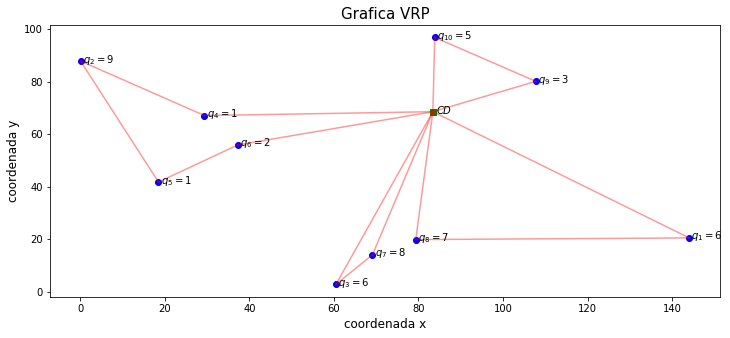

In [12]:
plt.figure(figsize=(12,5))
plt.scatter(X,Y,color="blue")
plt.scatter(X[0],Y[0],color="green",marker="s")
plt.annotate("$CD$",(X[0]+0.7,Y[0]-0.7))
for i in clientes:
    plt.annotate("$q_{%d}=%d$"%(i,q[(i)]),(X[i]+0.5,Y[i]-0.5))

for i,j in arcos_activos:
    plt.plot([X[i],X[j]],[Y[i],Y[j]],color="red",alpha=0.4)
plt.xlabel("coordenada x",size=12)
plt.ylabel("coordenada y",size=12)
plt.title("Grafica VRP",size=15)
plt.show()